## Procesado del histograma

In [1]:
#!pip install opencv_python
#!pip install scikit-image

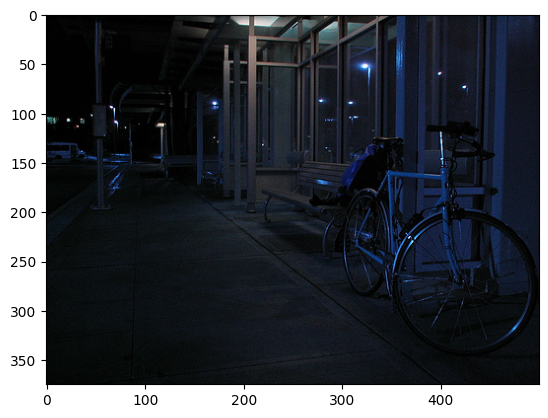

In [3]:
import cv2
from skimage import io
from matplotlib import pyplot as plt

img = cv2.imread("./image1.png", 1)
plt.imshow(img)

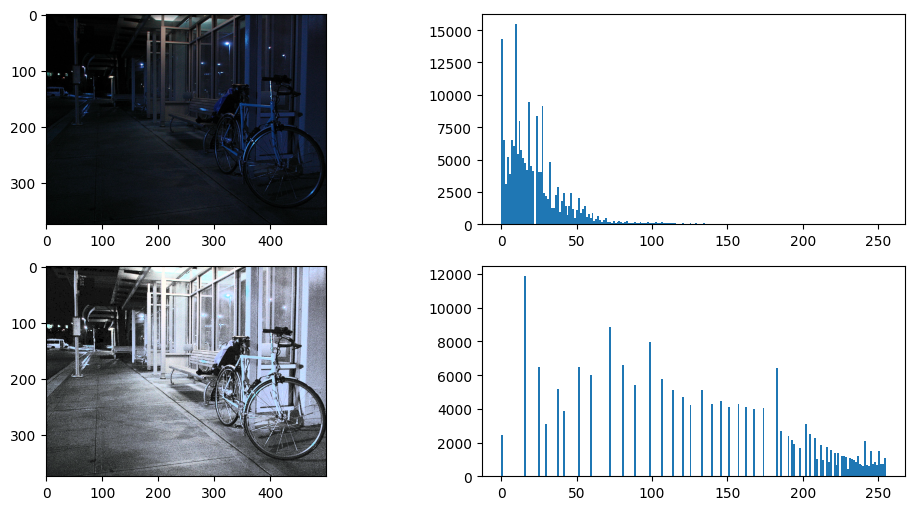

In [4]:
#Converting image to LAB Color so CLAHE can be applied to the luminance channel

lab_img= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

#Splitting the LAB image to L, A and B channels, respectively
l, a, b = cv2.split(lab_img)

plt.figure(figsize=(12, 6))
plt.subplot(221)
plt.imshow(img)
plt.subplot(222)
plt.hist(l.flat, bins=200, range=(0,255))
###########Histogram Equlization#############
#Apply histogram equalization to the L channel
equ = cv2.equalizeHist(l)


#Combine the Hist. equalized L-channel back with A and B channels
updated_lab_img1 = cv2.merge((equ,a,b))
updated_lab_img1 = cv2.cvtColor(updated_lab_img1, cv2.COLOR_LAB2BGR)


plt.subplot(223)
plt.imshow(updated_lab_img1)
plt.subplot(224)
plt.hist(equ.flat, bins=200, range=(0,255))

#Convert LAB image back to color (RGB)
hist_eq_img = cv2.cvtColor(updated_lab_img1, cv2.COLOR_LAB2BGR)

In [5]:
###########CLAHE#########################
#Apply CLAHE to L channel
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
clahe_img = clahe.apply(l)
#plt.hist(clahe_img.flat, bins=100, range=(0,255))

#Combine the CLAHE enhanced L-channel back with A and B channels
updated_lab_img2 = cv2.merge((clahe_img,a,b))

#Convert LAB image back to color (RGB)
# CLAHE (Contrast Limited Adaptive Histogram Equalization)
CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)

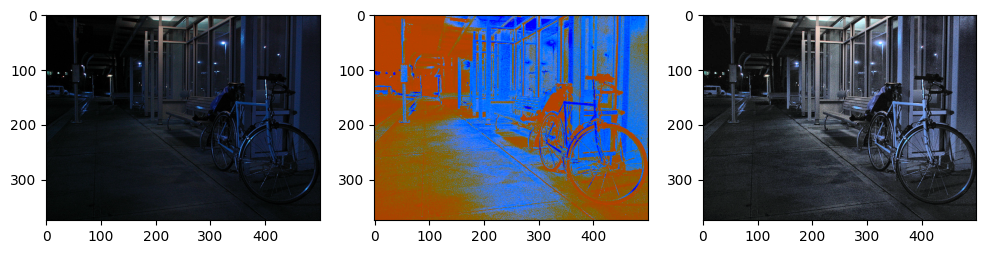

In [6]:
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(hist_eq_img)
plt.subplot(133)
plt.imshow(CLAHE_img)
plt.show()